In [44]:
# load plotting library and src files
using PyPlot
include("./src/calcpml_2d.jl");
include("./src/yeeder.jl");
include("./src/fdfd.jl");
include("./src/calc_gradient.jl");

In [45]:
Lx = 1;
dl = 0.01;
beta = 1;
lam = 2*Lx*beta;
spc = lam/2/4.0;
src = 0.5*lam/2;
pml = 40*dl;
Pol = "Hz";
BC = [-2,-2];
NPML = [0 0 40 40];
RES = [dl/2 dl/2];

e = 4.5;

Ne = 200;
Ls = linspace(0.1,2,Ne);

AVM_s = zeros(Ne,1);
D_s = zeros(Ne,1);
G_list = zeros(Ne,1);
phi_list = zeros(Ne,1);


In [46]:
for i in (1:Ne)
    println(i/Ne*100.0);
    
    Ly = Ls[i];
    Lx = Ly;
    X = lam;
    Y = 2*(Ly+spc+src+src+pml);
    
    Nx = Int(ceil(X/dl));
    Ny = Int(ceil(Y/dl));
    
    b_init = zeros(Complex64,Nx,Ny);
    b_init[:,Int(ceil(Ny/2-spc/dl-Ly/dl-src/dl))] = 1im;
    b_init[:,Int(ceil(Ny/2+spc/dl+Ly/dl+src/dl))] = 0 ;

    MUR2 = ones(Complex64,Nx*2,Ny*2);
    ER2 = ones(Complex64,Nx*2,Ny*2);

    #Ex0 = zeros(Complex64,Nx,Ny);
    #eps = zeros(Complex64,Nx,Ny);       
    #original calculation    
    #ER2[Int(Nx-L/dl-1):Int(Nx+L/dl+1),Int(Ny-2*spc/dl-2*L/dl-1):Int(Ny-2*spc/dl+1)] = eps/2;
    #ER2[Int(Nx-L/dl-1):Int(Nx+L/dl+1),Int(Ny+2*spc/dl-1):Int(Ny+2*spc/dl+2*L/dl+1)] = eps/2;    
    ER2[Int(ceil(Nx-Lx/dl)):Int(ceil(Nx+Lx/dl)),Int(ceil(Ny-2*spc/dl-2*Ly/dl)):Int(ceil(Ny-2*spc/dl))] = e;
    ER2[Int(ceil(Nx-Lx/dl)):Int(ceil(Nx+Lx/dl)),Int(ceil(Ny+2*spc/dl)):Int(ceil(Ny+2*spc/dl+2*Ly/dl))] = e;
    

    
    (Ex0,Ey0,Ez0,Hx0,Hy0,Hz0,eps) = fdfd(ER2,MUR2,RES,NPML,BC,lam,Pol,b_init);
    (G,phi) = calc_gradient(Ex0,lam,dl,beta);
    G_list[i] = G;
    phi_list[i] = phi;
 
    #adjoint calculation
    #xs = dl*(1:Nx);
    #b_adj = zeros(Complex64,Nx,Ny);    
    #b_adj[:,Int(Ny/2)] = exp(im*(2*pi/lam/beta*xs + phi*ones(Nx,1)));
    #(Ex_adj,Ey_adj,Ez_adj,Hx_adj,Hy_adj,Hz_adj) = fdfd(ER2,MUR2,RES,NPML,BC,lam,Pol,b_adj); 
    
    #direct calculations
    
end

0.5
1.0
1.5
2.0
2.5
3.0
3.5000000000000004
4.0
4.5
5.0
5.5
6.0
6.5
7.000000000000001
7.5
8.0
8.5
9.0
9.5
10.0
10.5
11.0
11.5
12.0
12.5
13.0
13.5
14.000000000000002
14.499999999999998
15.0
15.5
16.0
16.5
17.0
17.5
18.0
18.5
19.0
19.5
20.0
20.5
21.0
21.5
22.0
22.5
23.0
23.5
24.0
24.5
25.0
25.5
26.0
26.5
27.0
27.500000000000004
28.000000000000004
28.499999999999996
28.999999999999996
29.5
30.0
30.5
31.0
31.5
32.0
32.5
33.0
33.5
34.0
34.5
35.0
35.5
36.0
36.5
37.0
37.5
38.0
38.5
39.0
39.5
40.0
40.5
41.0
41.5
42.0
42.5
43.0
43.5
44.0
44.5
45.0
45.5
46.0
46.5
47.0
47.5
48.0
48.5
49.0
49.5
50.0
50.5
51.0
51.5
52.0
52.5
53.0
53.5
54.0
54.50000000000001
55.00000000000001
55.50000000000001
56.00000000000001
56.49999999999999
56.99999999999999
57.49999999999999
57.99999999999999
58.5
59.0
59.5
60.0
60.5
61.0
61.5
62.0
62.5
63.0
63.5
64.0
64.5
65.0
65.5
66.0
66.5
67.0
67.5
68.0
68.5
69.0
69.5
70.0
70.5
71.0
71.5
72.0
72.5
73.0
73.5
74.0
74.5
75.0
75.5
76.0
76.5
77.0
77.5
78.0
78.5
79.0
79.5
80.0
80

LoadError: LoadError: BoundsError: attempt to access 400x1460 Array{Complex{Float32},2}:
 1.0+0.0im  1.0+0.0im  1.0+0.0im  …  1.0+0.0im  1.0+0.0im  1.0+0.0im
 1.0+0.0im  1.0+0.0im  1.0+0.0im     1.0+0.0im  1.0+0.0im  1.0+0.0im
 1.0+0.0im  1.0+0.0im  1.0+0.0im     1.0+0.0im  1.0+0.0im  1.0+0.0im
 1.0+0.0im  1.0+0.0im  1.0+0.0im     1.0+0.0im  1.0+0.0im  1.0+0.0im
 1.0+0.0im  1.0+0.0im  1.0+0.0im     1.0+0.0im  1.0+0.0im  1.0+0.0im
 1.0+0.0im  1.0+0.0im  1.0+0.0im  …  1.0+0.0im  1.0+0.0im  1.0+0.0im
 1.0+0.0im  1.0+0.0im  1.0+0.0im     1.0+0.0im  1.0+0.0im  1.0+0.0im
 1.0+0.0im  1.0+0.0im  1.0+0.0im     1.0+0.0im  1.0+0.0im  1.0+0.0im
 1.0+0.0im  1.0+0.0im  1.0+0.0im     1.0+0.0im  1.0+0.0im  1.0+0.0im
 1.0+0.0im  1.0+0.0im  1.0+0.0im     1.0+0.0im  1.0+0.0im  1.0+0.0im
 1.0+0.0im  1.0+0.0im  1.0+0.0im  …  1.0+0.0im  1.0+0.0im  1.0+0.0im
 1.0+0.0im  1.0+0.0im  1.0+0.0im     1.0+0.0im  1.0+0.0im  1.0+0.0im
 1.0+0.0im  1.0+0.0im  1.0+0.0im     1.0+0.0im  1.0+0.0im  1.0+0.0im
    ⋮                             ⋱                                 
 1.0+0.0im  1.0+0.0im  1.0+0.0im     1.0+0.0im  1.0+0.0im  1.0+0.0im
 1.0+0.0im  1.0+0.0im  1.0+0.0im     1.0+0.0im  1.0+0.0im  1.0+0.0im
 1.0+0.0im  1.0+0.0im  1.0+0.0im  …  1.0+0.0im  1.0+0.0im  1.0+0.0im
 1.0+0.0im  1.0+0.0im  1.0+0.0im     1.0+0.0im  1.0+0.0im  1.0+0.0im
 1.0+0.0im  1.0+0.0im  1.0+0.0im     1.0+0.0im  1.0+0.0im  1.0+0.0im
 1.0+0.0im  1.0+0.0im  1.0+0.0im     1.0+0.0im  1.0+0.0im  1.0+0.0im
 1.0+0.0im  1.0+0.0im  1.0+0.0im     1.0+0.0im  1.0+0.0im  1.0+0.0im
 1.0+0.0im  1.0+0.0im  1.0+0.0im  …  1.0+0.0im  1.0+0.0im  1.0+0.0im
 1.0+0.0im  1.0+0.0im  1.0+0.0im     1.0+0.0im  1.0+0.0im  1.0+0.0im
 1.0+0.0im  1.0+0.0im  1.0+0.0im     1.0+0.0im  1.0+0.0im  1.0+0.0im
 1.0+0.0im  1.0+0.0im  1.0+0.0im     1.0+0.0im  1.0+0.0im  1.0+0.0im
 1.0+0.0im  1.0+0.0im  1.0+0.0im     1.0+0.0im  1.0+0.0im  1.0+0.0im
  at index [0:400,280:680]
while loading In[46], in expression starting on line 1

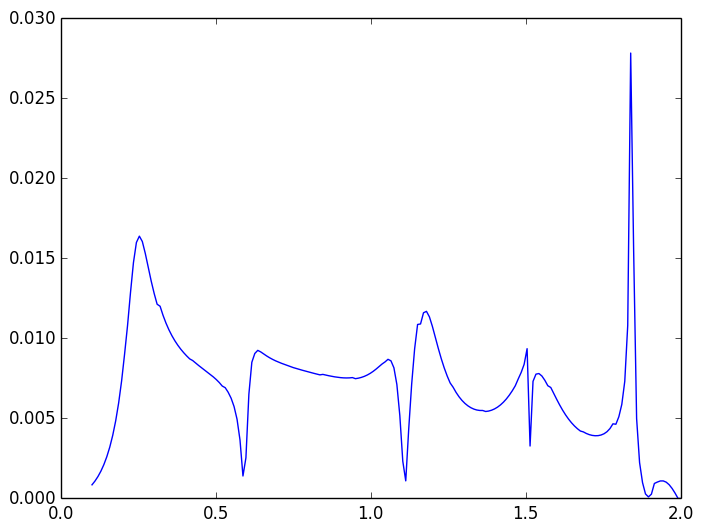

In [48]:
plot(Ls,G_list);


In [15]:
pcolormesh(real(Ex0[:,20:end-20]),cmap="RdBu")
colorbar()

LoadError: LoadError: UndefVarError: Ex0 not defined
while loading In[15], in expression starting on line 1

.0


0.45135944105648046

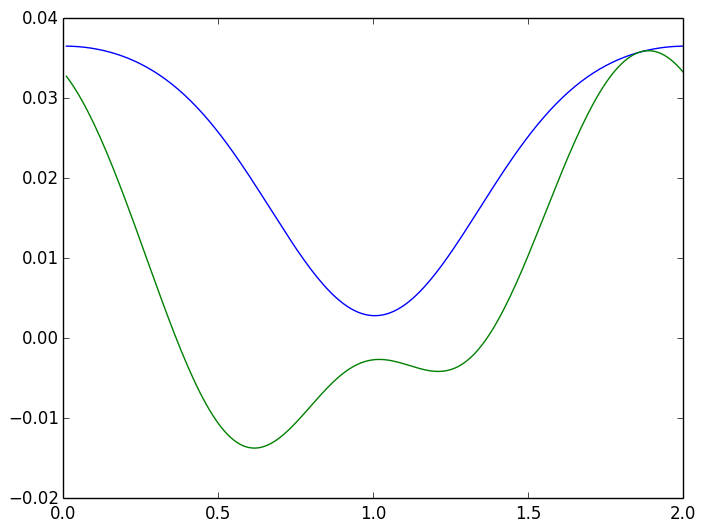

1.4985224295903057

In [160]:
xs = dl*(1:Nx);
(a,b) = size(Ex0);
#plot(xs,imag(Ex0[:,Int(b/2)]))
phi = phi_list[1];
println(phi)
plot(xs,real(Ex0[:,int(b/2)]))
plot(xs,real(Ex0[:,Int(b/2)].*exp(im*(2*pi/lam/beta*xs + phi*ones(Nx,1)))))
sum(real(Ex0[:,Int(b/2)].*exp(im*(2*pi/lam/beta*xs + phi*ones(Nx,1)))))

In [11]:
 (G,phi) = calc_gradient(Ex0,lam,dl,beta);
println(G)

0.012283592237467264


In [198]:
lam

2

In [6]:
L/dl

100.0

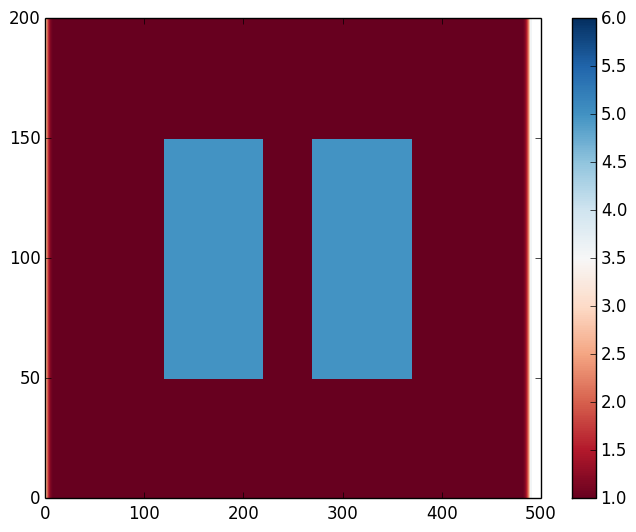

PyObject <matplotlib.colorbar.Colorbar instance at 0x3342f85a8>

In [202]:
pcolormesh(eps,cmap="RdBu",vmin=1,vmax=6)
colorbar()

In [96]:
Nx

200